# Bias-Variance Tradeoff - Lab

## Introduction

In this lab, you'll practice the concepts you learned in the last lesson, bias-variance tradeoff. 

## Objectives

In this lab you will: 

- Demonstrate the tradeoff between bias and variance by way of fitting a machine learning model 

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year. Start by running the following cell which imports all the necessary functions and the dataset: 

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_excel('movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


Subset the `df` DataFrame to only keep the `'domgross'`, `'budget'`, `'imdbRating'`, `'Metascore'`, and `'imdbVotes'` columns. 

In [32]:
# Subset the DataFrame
cols_to_keep = ['domgross', 'budget', 'imdbRating', 'Metascore', 'imdbVotes']

df = df[cols_to_keep]

## Split the data


- First, assign the predictors to `X` and the outcome variable, `'domgross'` to `y` 
- Split the data into training and test sets. Set the seed to 42 and the `test_size` to 0.25 

In [33]:
# domgross is the outcome variable
X = df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler
scaler = MinMaxScaler()

Use the `MinMaxScaler` to scale the training set. Remember you can fit and transform in a single method using `.fit_transform()`.  

Then, use `.transform()` to apply the scaler to the test set.

In [35]:
# fit and transform X_train
# X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)

# transform X_test
X_test_scaled = scaler.fit_transform(X_test)

## Fit a regression model to the training data

In [36]:
# Your code 
from sklearn.linear_model import LinearRegression

# create an instance of linear regression
linreg = LinearRegression()

# fit the model to X_train and y_train
linreg.fit(X_train_scaled, y_train)

LinearRegression()

Use the model to make predictions on both the training and test sets: 

In [37]:
# Training set predictions
lm_train_predictions = linreg.predict(X_train_scaled)

# Test set predictions 
lm_test_predictions = linreg.predict(X_test_scaled)

Plot predictions for the training set against the actual data: 

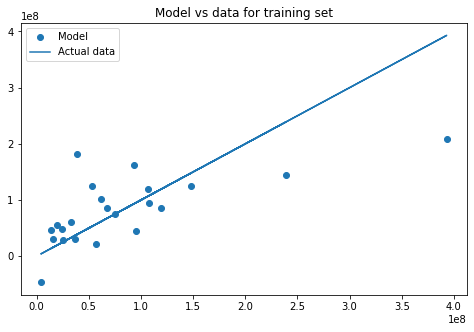

In [38]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, lm_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

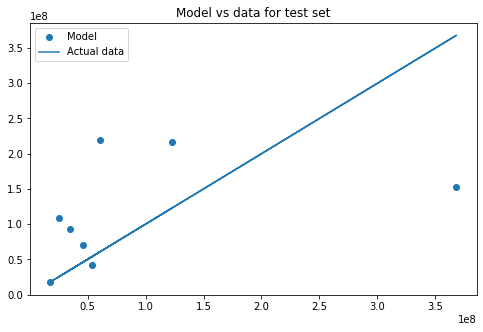

In [39]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lm_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

## Bias

Create a function `bias()` to calculate the bias of a model's predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  

In [40]:
import numpy as np
def bias(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # find difference between predicted / true values
    differences = y_pred - y_true
    
    bias = np.mean(differences)
    
    return bias

## Variance
Create a function `variance()` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [41]:
def variance(y_pred):
    y_pred = np.array(y_pred)
    
    # calculated expected value (mean) of predictions
    E_y_pred = np.mean(y_pred)

    squared_diffs = (y_pred - E_y_pred) ** 2
    
    variance_value = np.mean(squared_diffs)
    
    return variance_value

## Calculate bias and variance

In [42]:
# Bias and variance for training set 
b = bias(y_train, lm_train_predictions)
v = variance(lm_train_predictions)
print(f'Train bias: {b:.14f} \nTrain variance: {v:.2f}')

# Train bias (approximate): -4.063953052867542e-09 
# Train variance (approximate): 3406811040986517.0

Train bias: -0.00000001219186 
Train variance: 3406811040986515.50


In [43]:
# Bias and variance for test set 
b = bias(y_test, lm_test_predictions)
v = variance(lm_test_predictions)
print(f'Test bias: {b:.2f} \nTest variance: {v:.2f}')

# Test bias: -10982393.918069275 
# Test variance: 1518678846127932.0

Test bias: 23766228.25 
Test variance: 5024352265882425.00


## Overfit a new model 

Use `PolynomialFeatures` with degree 3 and transform `X_train_scaled` and `X_test_scaled`. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

*Budget* times *MetaScore* squared

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape()`! 


In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [45]:
# Check the shape
print("Shape of X_train_poly:", np.shape(X_train_poly))
print("Shape of X_test_poly:", np.shape(X_test_poly))

Shape of X_train_poly: (22, 35)
Shape of X_test_poly: (8, 35)


Fit a regression model to the training data: 

In [46]:
# Your code here
polyreg = LinearRegression()
polyreg.fit(X_train_poly, y_train)

LinearRegression()

Use the model to make predictions on both the training and test sets: 

In [47]:
# Training set predictions
poly_train_predictions = polyreg.predict(X_train_poly)

# Test set predictions
poly_test_predictions = polyreg.predict(X_test_poly)

Plot predictions for the training set against the actual data: 

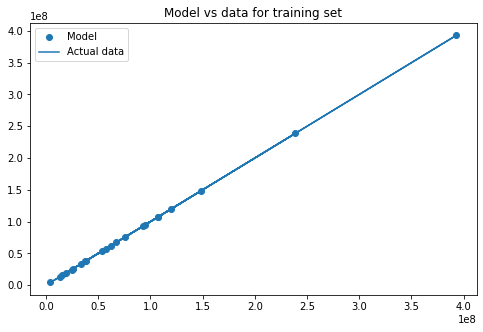

In [48]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_train, poly_train_predictions, label='Model')
plt.plot(y_train, y_train, label='Actual data')
plt.title('Model vs data for training set')
plt.legend();

Plot predictions for the test set against the actual data: 

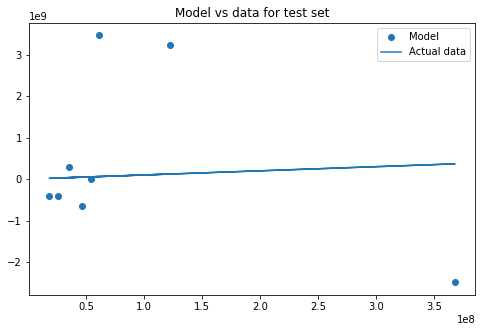

In [49]:
# Run this cell - vertical distance between the points and the line denote the errors
plt.figure(figsize=(8, 5))
plt.scatter(y_test, poly_test_predictions, label='Model')
plt.plot(y_test, y_test, label='Actual data')
plt.title('Model vs data for test set')
plt.legend();

Calculate the bias and variance for the training set: 

In [50]:
# Bias and variance for training set 
b = bias(y_train, poly_train_predictions)
v = variance(poly_train_predictions)
print('Train bias: {} \nTrain variance: {}'.format(b, v))

# Train bias (approximate): -2.0997090773148971e-07
# Train variance (approximate): 7394168636697528.0

Train bias: -4.53130765394731e-07 
Train variance: 7394168636697396.0


Calculate the bias and variance for the test set: 

In [51]:
# Bias and variance for test set 
b = bias(y_test, poly_test_predictions)
v = variance(poly_test_predictions)
print('Test bias: {} \nTest variance: {}'.format(b, v))

# Test bias: -68166032.47666144 
# Test variance: 4.798244829435879e+16

Test bias: 286956509.23893565 
Test variance: 3.566382193891499e+18


## Interpret the overfit model

In [52]:
# The extremely high test bias (286956509.24) indicates significant underfitting, while the astronomically large 
#  test variance (3.57e+18) strongly suggests severe overfitting, likely due to an excessively high polynomial degree 
#  or an excessive number of features relative to the training set size.

## Level Up (Optional)

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by adding just a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using both simple and complex models. 